In [2]:
%matplotlib widget

from matplotlib import pyplot as plt
import os
from themachinethatgoesping.echosounders.simrad import FileRaw,FileRaw_mapped,SimradDatagram_type_from_string,datagram_type_to_string,t_SimradDatagramType
import themachinethatgoesping.echosounders.simrad as simrad
import themachinethatgoesping.echosounders.simrad.datagrams as dg
import themachinethatgoesping.tools.progressbars as prg
import themachinethatgoesping.tools as tools
import themachinethatgoesping.navigation.nmea_0183 as NMEA
import numpy
import os, sys
from time import time
from tqdm.auto import tqdm
from collections import defaultdict
import numpy as np

#load files
folders =  ["/home/data/"]
folders =  ["/home/data/turbeams/","/home/data/no_backup/GEOMAR/"]
#folders = ["/home/data/no_backup/ek80_test/"]
folders = ["/home/data/test_data/"]

files = []
for folder in folders:
    for r,d,f in os.walk(folder):
        for file in f:
            if file.endswith('.raw'):
                files.append(r + '/' +file)
            
files.sort()
file_name = files[0]
len(files)
#files

12

In [40]:
i=0

In [43]:
fm = FileRaw_mapped(files[i])
i+=1
print(fm)

indexing file ⢀ 100% :00s<00m:00s] [Found: 162668 packages]                        
FileSimradRaw
#############
- File path:         ...yoann/DuFT/TAN2210-D20220906-T085953.raw 
- Total file size: : 1.00 GB                                     

 Detected datagrams 
-------------------- 
- Total:           162668 
- Packages [NME0]: 123523 [NMEA text datagram]
- Packages [XML0]: 16777  [XML0 text datagram]
- Packages [FIL1]: 4      [Filter binary datagram]
- Packages [RAW3]: 11182  [Sample binary datagram]
- Packages [RAW4]: 11182  [unknown (878133586)]

 Pings 
-------        
- Detected Pings: 11182 [RAW3]


In [31]:
fm("FIL1")[3]

Filter binary datagram (FIL1)
#############################
- length:        1132          [bytes]
- datagram_type: FIL1          
- timestamp:     1662454793.81 [s]
- date:          06/09/2022    [MM/DD/YYYY]
- time:          08:59:53.809  [HH:MM:SS]

 Filter datagram content 
------------------------- 
- Stage:            2                            
- Spare_1:                                       
- Spare_2:          0                            
- ChannelID:        WBTTube253688-15ES120-7CD_ES 
- NoOfCoefficients: 123                          
- DecimationFactor: 10                           

 Filter coefficients 
---------------------     
- Coefficients: {{-5.648989e-06, -2.987593e-05}, 
                { 8.590669e-06,  2.628502e-05},
                {-1.709771e-05, -3.644106e-05},
                { 3.035760e-05,  4.775690e-05},
                {-4.915308e-05, -5.947649e-05},
                { 7.507811e-05,  7.045595e-05},
                {-1.088419e-04, -7.911470e-05},
      

In [9]:
fm.navigation().packages("NME0")[10]

NMEA text datagram
##################
- length:        48            [bytes]
- datagram_type: NME0          
- timestamp:     1513250778.97 [s]
- date:          14/12/2017    [MM/DD/YYYY]
- time:          11:26:18.973  [HH:MM:SS]

 Nmea sentence 
---------------                      
- Sender:        GP                                   
- Type:          ZDA                                  
- Full sentence: $GPZDA,112619.00,14,12,2017,00,00    

In [5]:
containers = fm.pings().break_by_time_diff(3600)
containers

In [6]:
cnt=1
containers[cnt].find_channel_ids()

['WBT 545579-15 ES200-7C',
 'WBT 545603-15 ES120-7C',
 'WBT Mini 261197-15 ES38-7']

In [7]:
channel_id = 1
fpings = containers[cnt](containers[cnt].find_channel_ids()[channel_id])
print(f"{containers[cnt].find_channel_ids()[channel_id]}: {len(fpings)}")

WBT 545603-15 ES120-7C: 1143


  0%|          | 0/1143 [00:00<?, ?it/s]

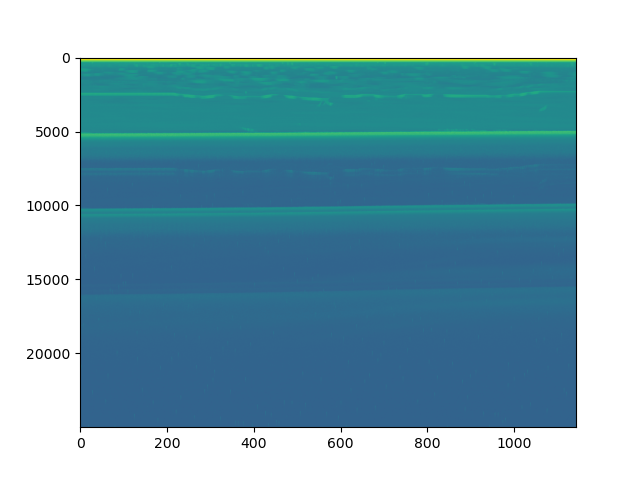

In [8]:
pings = fpings(0,-1,1)

nsamples = min(30000,pings.max_number_of_samples())
#nsamples = 7000

image = np.empty((len(pings),nsamples),dtype=np.float32)
image.fill(np.nan)

for i,ping in enumerate(tqdm(pings)):
    sv = ping.get_sv_stacked(dB = True)
    #sv = ping.sample_data.get_power(dB = True)
    ns = min(nsamples,len(sv))
    image[i,:ns] = sv[:ns]
    
plt.close("echo")
fig = plt.figure("echo")
ax = fig.subplots()
ax.imshow(image.transpose(), aspect = 'auto')
#ax.imshow(image.transpose(), aspect = 'auto', vmin = -120, vmax =-80)
#ax.imshow(image.transpose(), aspect = 'auto', vmin = -100, vmax =-50)

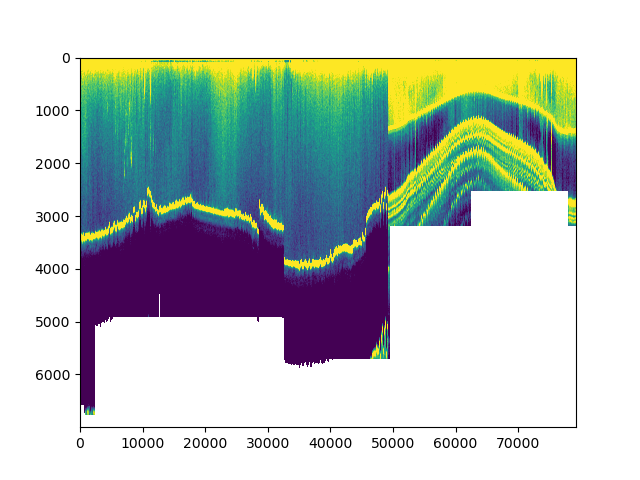